Importing the dependencies

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

Loading the dataset

In [28]:
df = pd.read_csv("C://Users//subha//Downloads//archive (2)//car data.csv")

In [25]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
 9   Age            301 non-null    int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 23.6+ KB


In [27]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner,Age
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189,10.372093
std,2.891554,5.082812,8.642584,38886.883882,0.247915,2.891554
min,2003.000000,0.100000,0.320000,500.000000,0.000000,6.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000,8.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000,10.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000,12.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000,21.000000


In [3]:
df.dropna(inplace=True)

In [4]:
current_year = 2024
df['Age'] = current_year - df['Year']

In [5]:
df_encoded = pd.get_dummies(df, columns=['Fuel_Type', 'Selling_type', 'Transmission'])

In [6]:
X = df_encoded.drop(['Car_Name', 'Year', 'Selling_Price'], axis=1)
y = df_encoded['Selling_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Training Regression Model

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Model Prediction

In [8]:
y_pred = model.predict(X_test)

In [20]:
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R^2) Score: {r2}')

Mean Squared Error (MSE): 3.481349830511818
Root Mean Squared Error (RMSE): 1.8658375680942374
R-squared (R^2) Score: 0.8488707839193154


**Mean Squared Error**

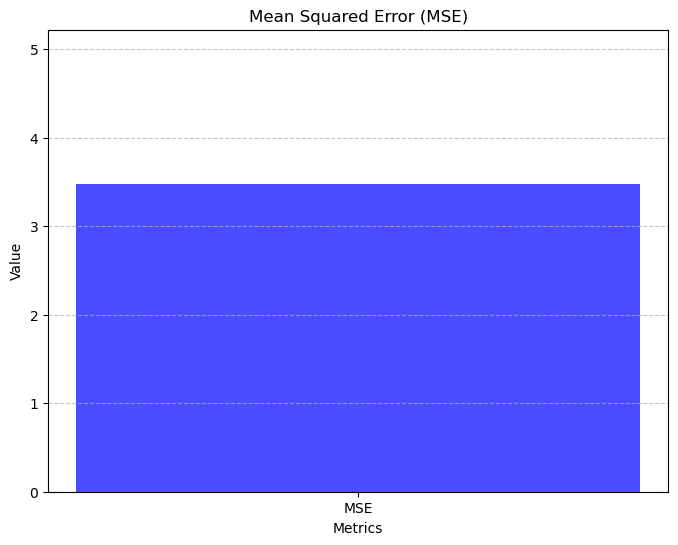

In [21]:
plt.figure(figsize=(8, 6))
plt.bar(['MSE'], [mse], color='blue', alpha=0.7)
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.ylim([0, max(mse * 1.5, 1.0)])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Root Mean Squared Error**

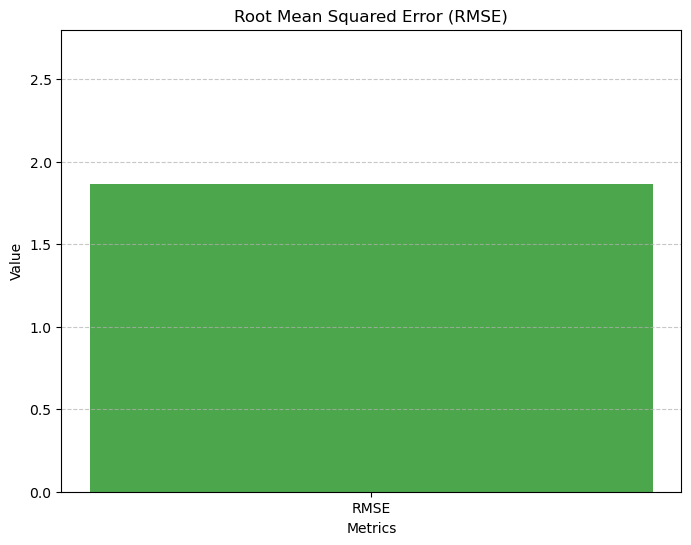

In [22]:
plt.figure(figsize=(8, 6))
plt.bar(['RMSE'], [rmse], color='green', alpha=0.7)
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.ylim([0, max(rmse * 1.5, 1.0)])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**R-squared score**

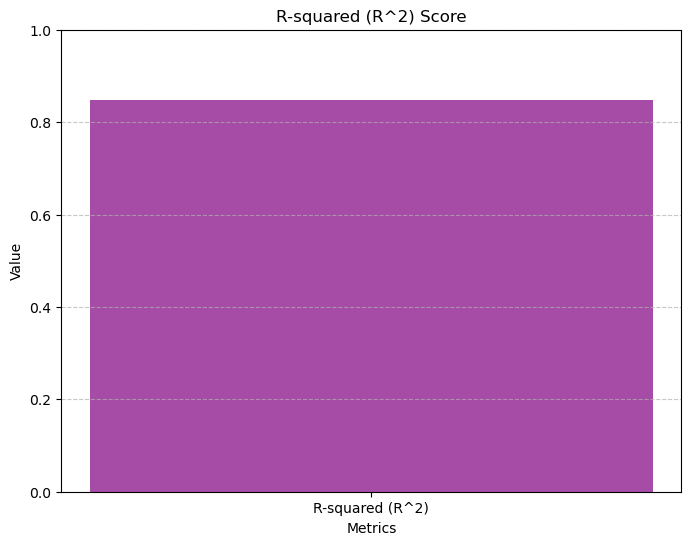

In [23]:
plt.figure(figsize=(8, 6))
plt.bar(['R-squared (R^2)'], [r2], color='purple', alpha=0.7)
plt.title('R-squared (R^2) Score')
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.ylim([0, 1.0])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()